## Assignment 3 | Data Classification
---
### Special Topics in Information Systems course | Faculty of Engineering | AlexU
#### MAGIC gamma telescope dataset
---

## 1. import dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
% matplotlib inline

In [4]:
df = pd.read_csv('data.txt')
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## 2. Understanding Data

In [7]:
print(df.shape)
print(df.axes)

(19020, 11)
[RangeIndex(start=0, stop=19020, step=1), Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')]


The dataset contains 2310 readings/samples, 19 features for each. And there are 7 class labels.  
Attribute Information:

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

g = gamma (signal): 12332
h = hadron (background): 6688

For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events.

The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments.

In [9]:
# find data types of each attribute
df.dtypes

fLength     float64
fWidth      float64
fSize       float64
fConc       float64
fConc1      float64
fAsym       float64
fM3Long     float64
fM3Trans    float64
fAlpha      float64
fDist       float64
class        object
dtype: object

In [38]:
# find counts of each class in the dataset
df['class'].value_counts()

g    12332
h     6688
Name: class, dtype: int64

In [244]:
# balncing the dataset
g = df.groupby('class')
balanced_df = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)

In [79]:
# find counts of each class in the new dataset
balanced_df['class'].value_counts()

h    6688
g    6688
Name: class, dtype: int64

## 3. Data Exploration

In [54]:
balanced_df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000,13376.000000
mean,57.198754,23.650754,2.839968,0.379499,0.214817,-7.583303,7.472922,0.307766,31.459454,195.475710
std,47.007843,20.901155,0.473805,0.184693,0.112209,65.557952,56.342739,23.229867,26.918034,76.200924
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.694625,11.703675,2.495500,0.233500,0.127175,-24.220475,-14.676675,-10.950275,7.386425,142.501500
50%,38.528250,17.147050,2.751200,0.355800,0.198000,2.681300,14.648500,0.606250,23.497600,193.846200
75%,75.998175,26.140000,3.114800,0.505425,0.286725,23.696350,34.759650,11.126050,52.546875,243.316000
max,334.177000,256.382000,5.323300,0.893000,0.674000,575.240700,238.321000,179.851000,90.000000,495.561000


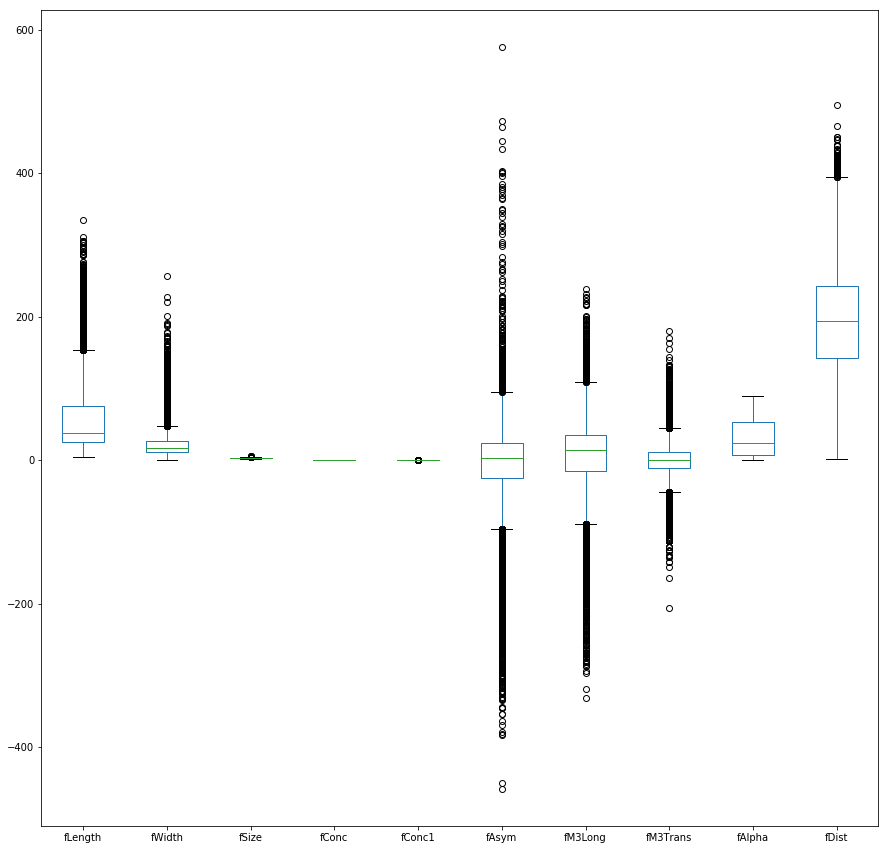

In [97]:
boxplot = balanced_df.boxplot(figsize=(15,15), grid=False)

#### Features Variablity and Distribution

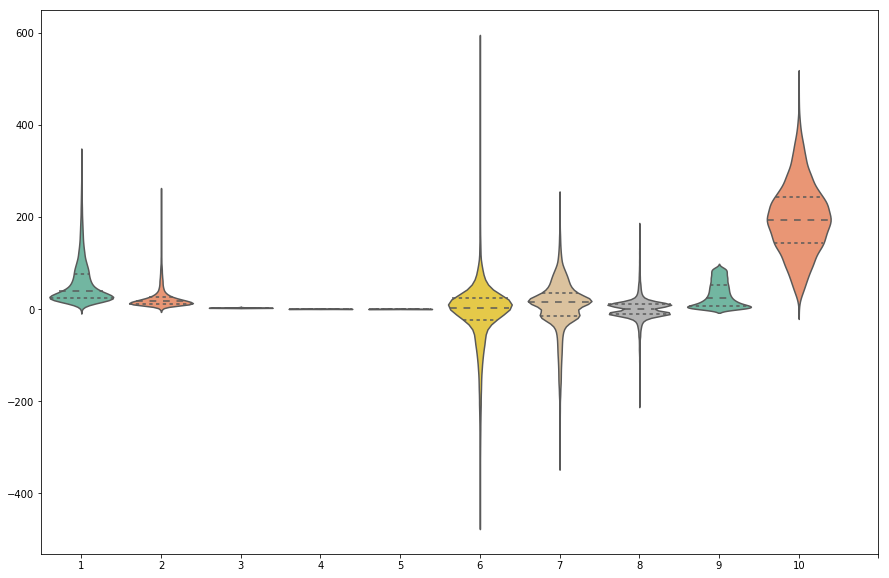

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sb.violinplot(ax=ax, data=balanced_df, palette="Set2", split=True,
                   scale="count", inner="quartile")

_ = ax.set(xticks=range(len(balanced_df.columns)), xticklabels=range(1, len(balanced_df.columns)))


In [63]:
# get feature by index
balanced_df.columns[6]

'fM3Long'

#### Classes distribution

h    6688
g    6688
Name: class, dtype: int64

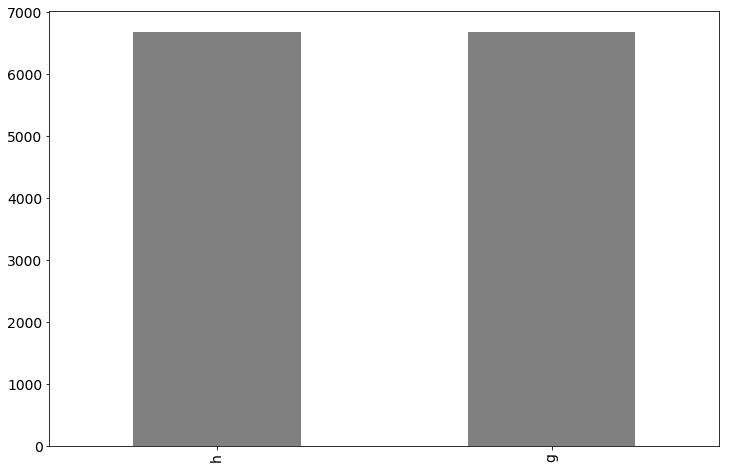

In [60]:
plt.figure()
class_counts = balanced_df['class'].value_counts()
class_counts.plot.bar(figsize=(12,8), color="grey", fontsize=14)
class_counts

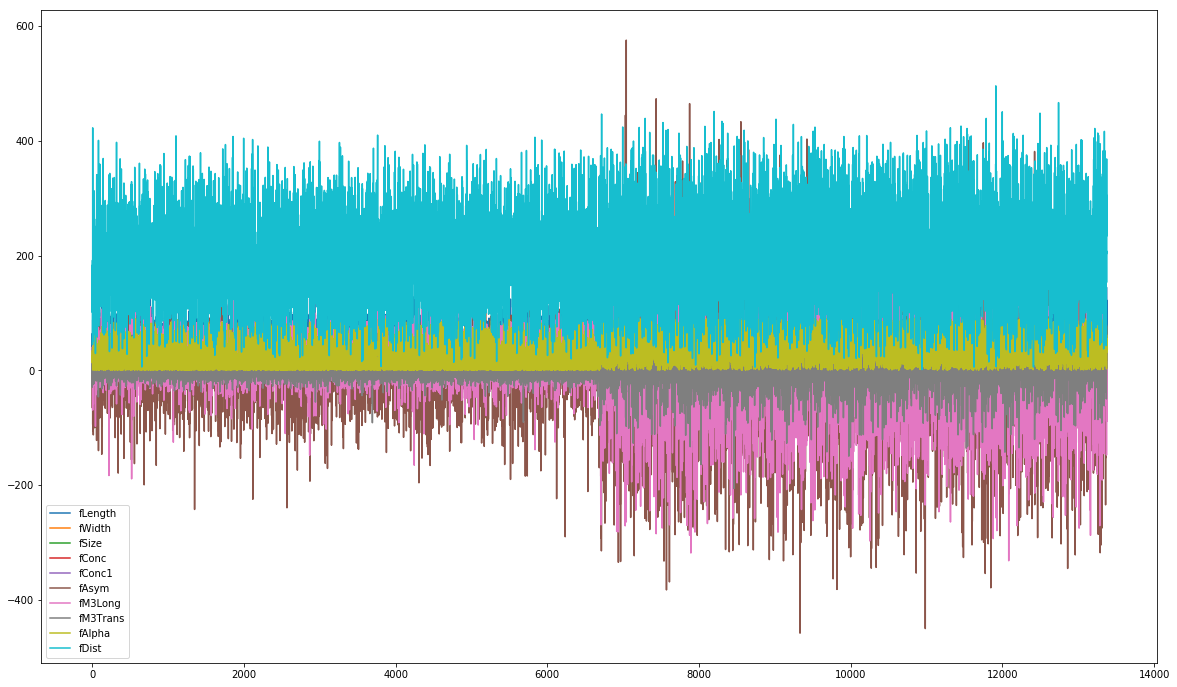

In [61]:
# line plot
balanced_df.plot(figsize=(20,12));

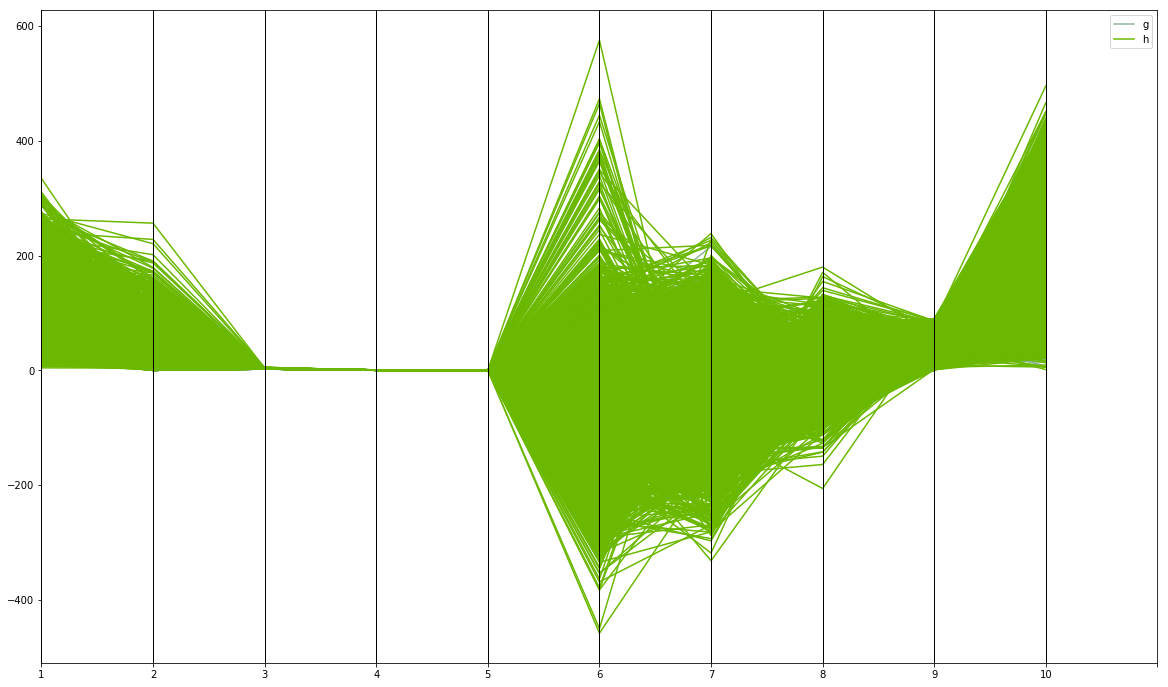

In [62]:
plt.figure(figsize=(20,12))
ax = pd.plotting.parallel_coordinates(balanced_df, 'class');
ax.set(xticks=range(len(balanced_df.columns)), xticklabels=range(1, len(balanced_df.columns)));
ax.grid(False)

#### Features Corellations

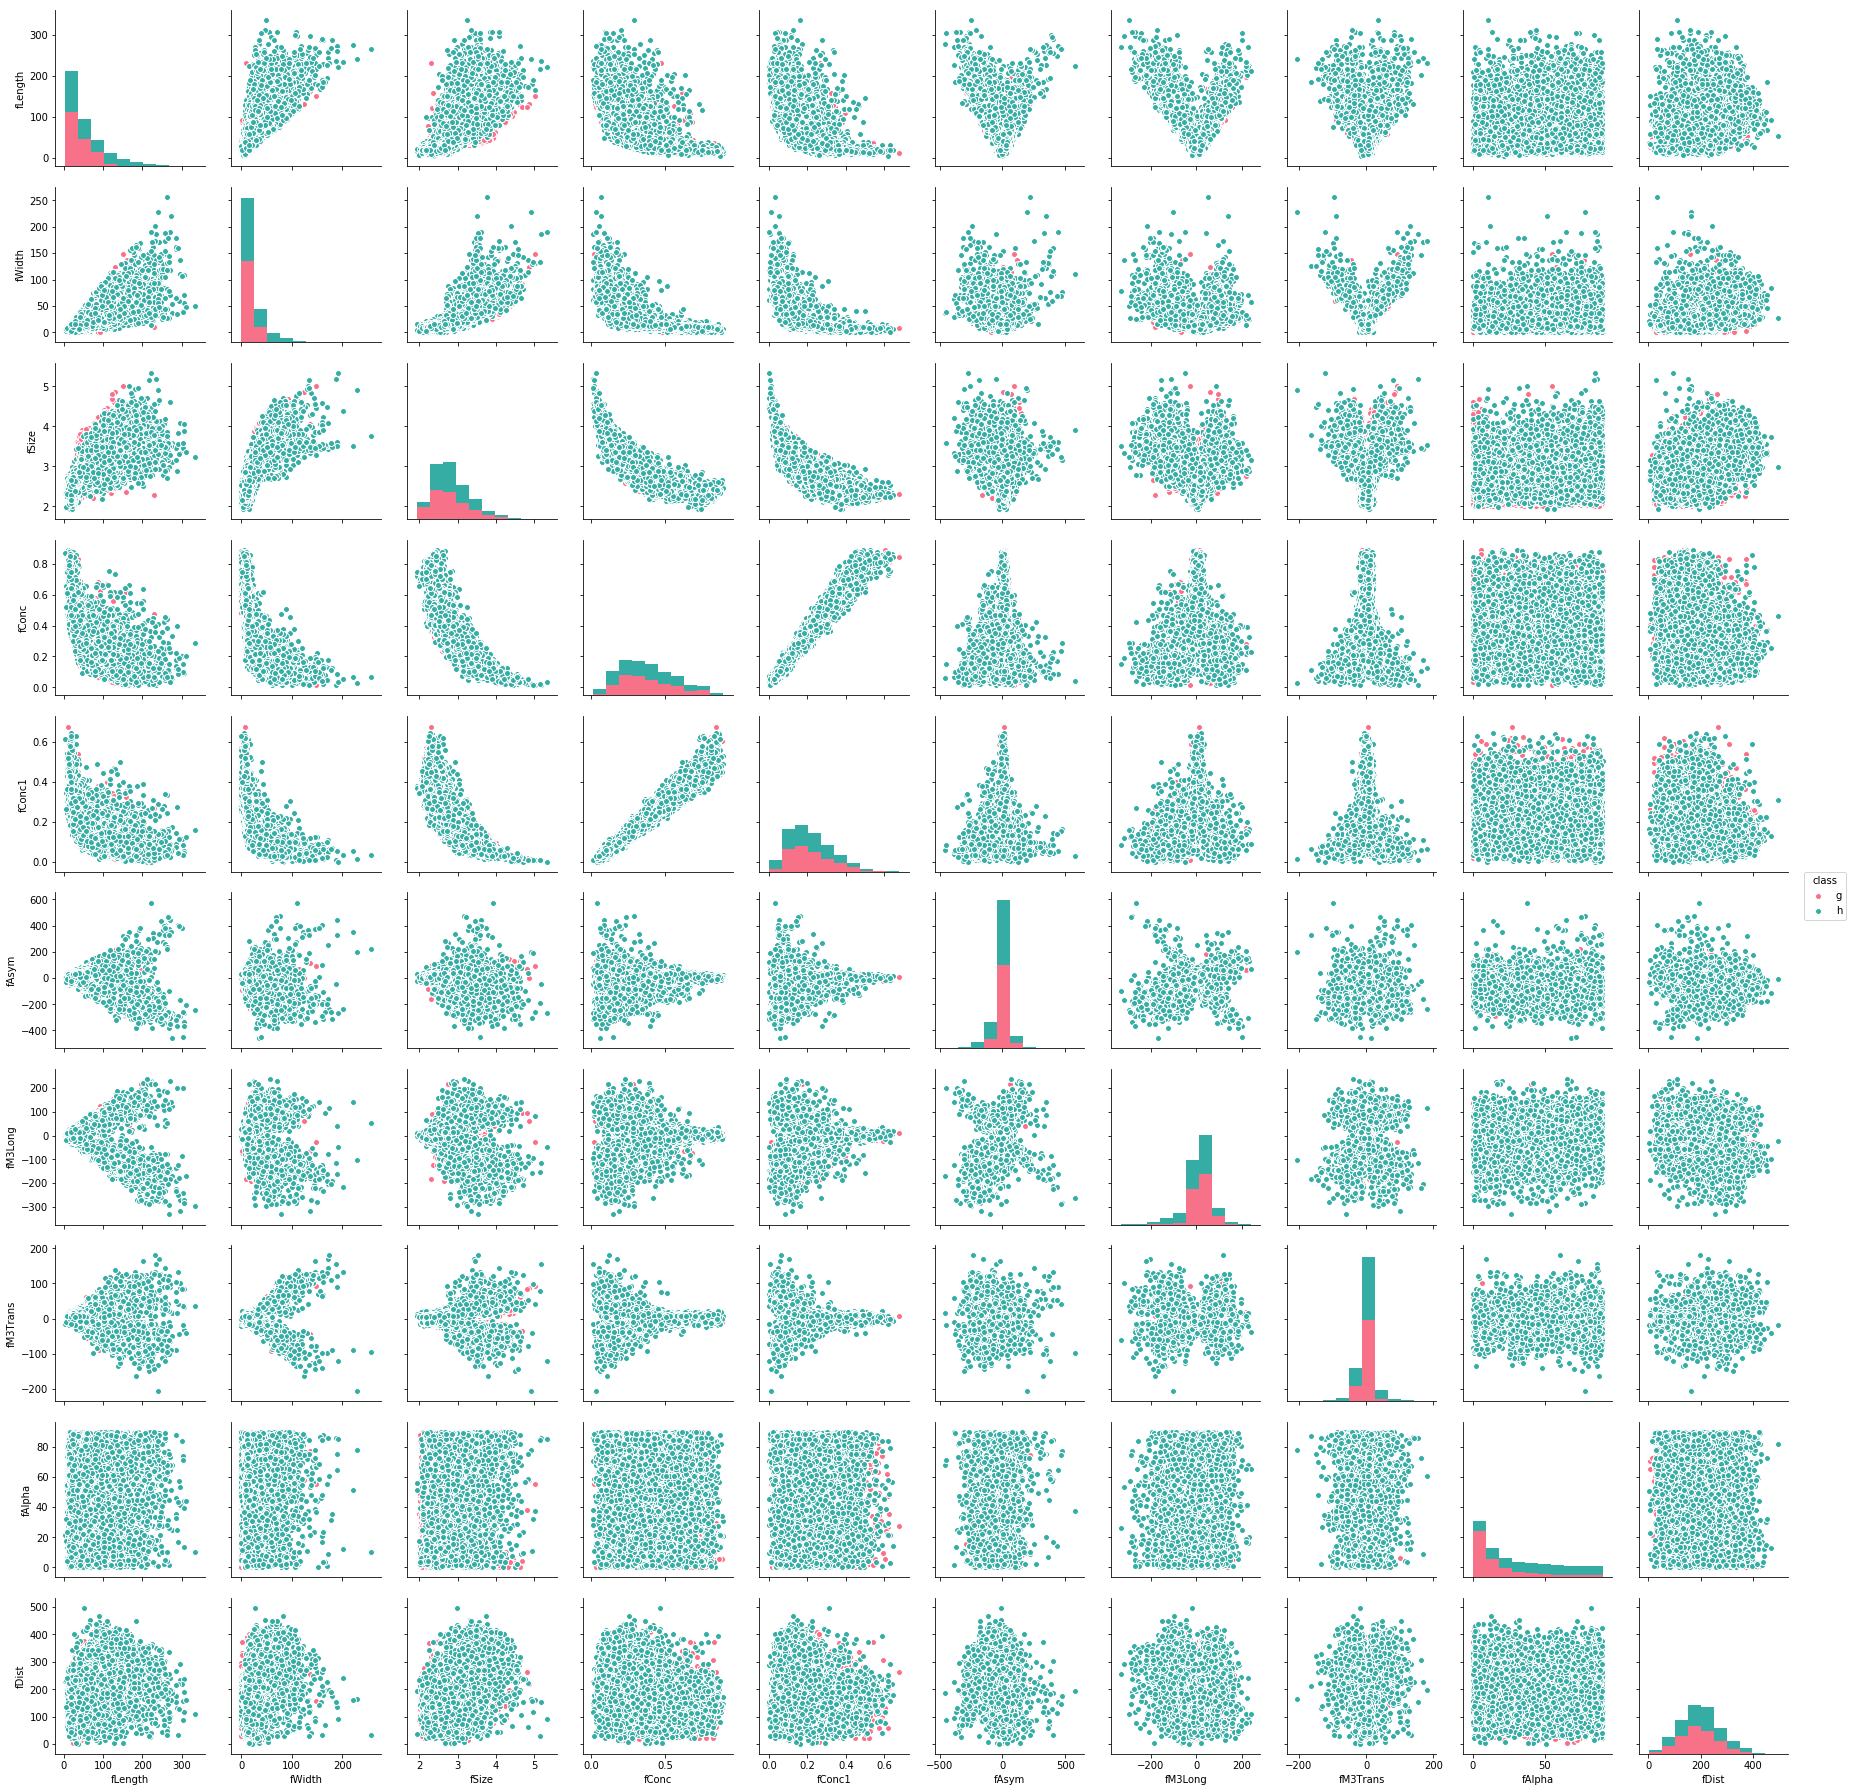

In [64]:
# scatter plot in a correlation matrix
sb_plt = sb.pairplot(balanced_df, diag_kind='hist', hue='class', palette="husl");


#### Pearsons's r

In [65]:
balanced_df.fillna(inplace=True, value=0)

In [66]:
pearson_corr = balanced_df.corr(method='pearson', min_periods=1)
pearson_corr

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000000,0.775691,0.709434,-0.637105,-0.602804,-0.396391,-0.201661,0.015098,0.032625,0.388509
fWidth,0.775691,1.000000,0.730666,-0.617779,-0.587655,-0.287361,-0.234561,0.043906,0.090964,0.339425
fSize,0.709434,0.730666,1.000000,-0.846139,-0.802797,-0.207476,-0.011629,0.019502,-0.119079,0.426083
fConc,-0.637105,-0.617779,-0.846139,1.000000,0.975229,0.151561,-0.042806,-0.013076,0.167777,-0.312332
fConc1,-0.602804,-0.587655,-0.802797,0.975229,1.000000,0.137419,-0.043483,-0.012641,0.164880,-0.288634
fAsym,-0.396391,-0.287361,-0.207476,0.151561,0.137419,1.000000,0.281886,0.002287,-0.042396,-0.214637
fM3Long,-0.201661,-0.234561,-0.011629,-0.042806,-0.043483,0.281886,1.000000,-0.017324,-0.151073,-0.020954
fM3Trans,0.015098,0.043906,0.019502,-0.013076,-0.012641,0.002287,-0.017324,1.000000,0.007022,0.009942
fAlpha,0.032625,0.090964,-0.119079,0.167777,0.164880,-0.042396,-0.151073,0.007022,1.000000,-0.174178
fDist,0.388509,0.339425,0.426083,-0.312332,-0.288634,-0.214637,-0.020954,0.009942,-0.174178,1.000000


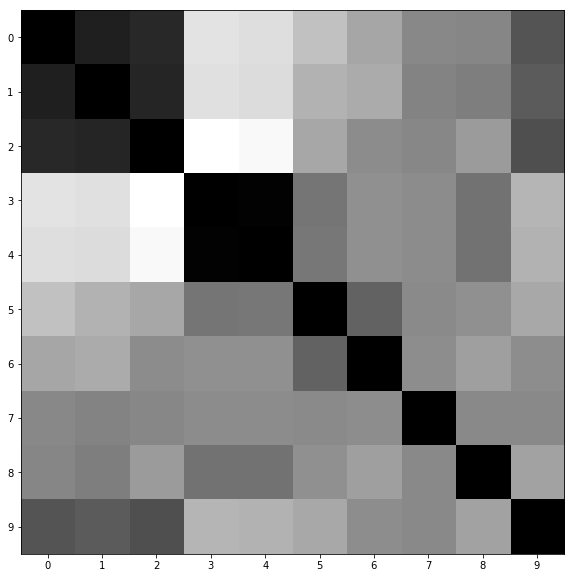

In [68]:
import matplotlib.cm as cm
fig = plt.figure(figsize=(16, 10))
plt.imshow(pearson_corr, interpolation='None', cmap=cm.gray_r)
plt.xticks(range(0,10))
plt.yticks(range(0,10))
plt.show()

In [213]:
def plt_histogram(class_name, bins_num=5):
    plt.figure(figsize=(14,7))
    plt.title("Class: " + class_name)
    data = balanced_df[balanced_df['class'] == class_name]
    for cl in data.columns[:-1]:
        plt.hist(data[cl], alpha=0.6, bins=bins_num, label=cl);
    plt.legend();

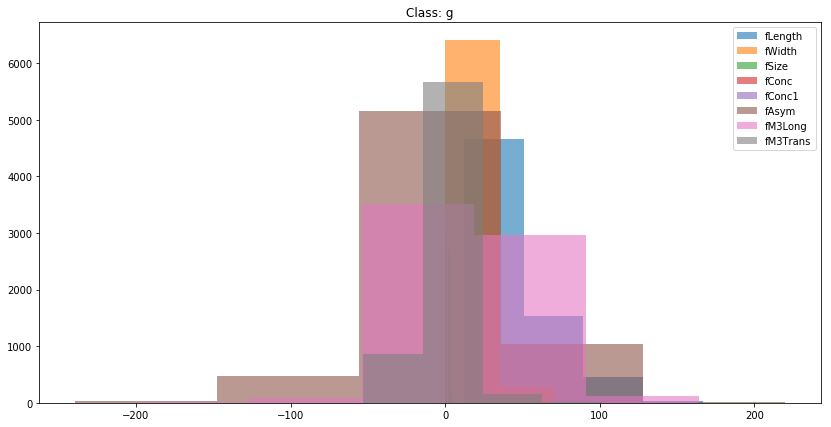

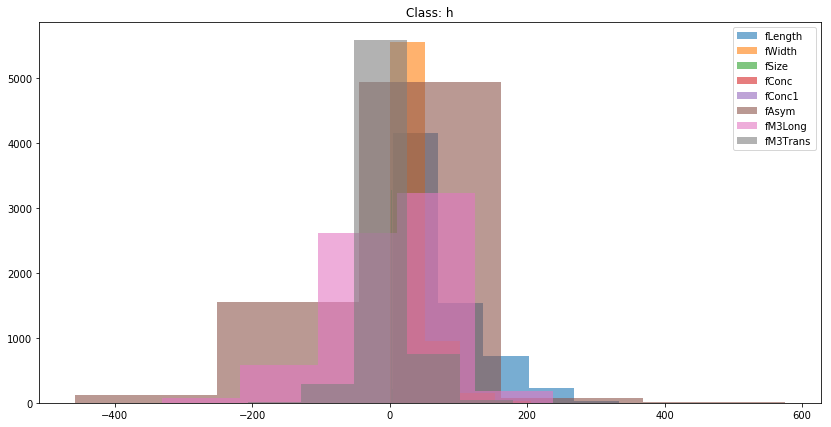

In [216]:
classes = ['g', 'h']
for cl in classes:
    plt_histogram(cl, 5)

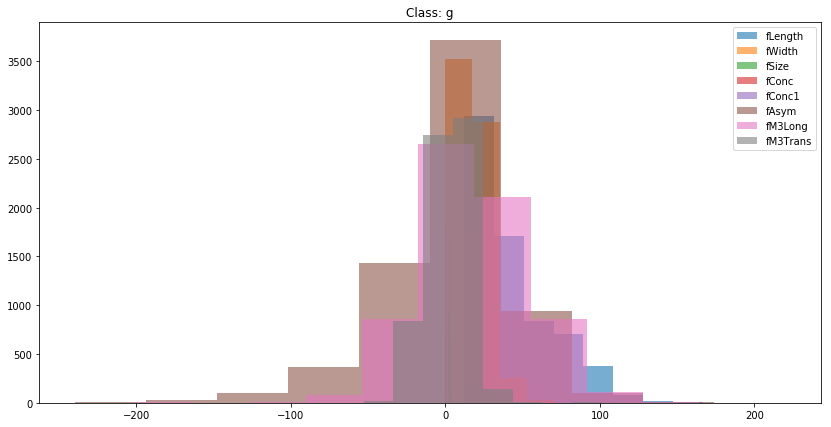

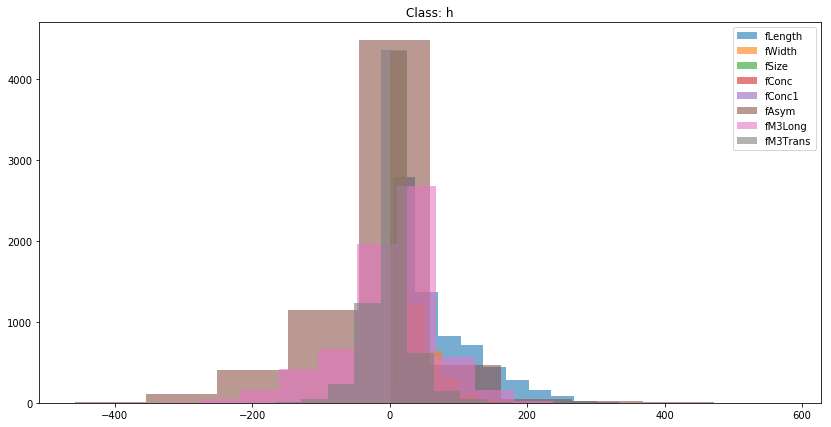

In [217]:
for cl in classes:
    plt_histogram(cl, 10)

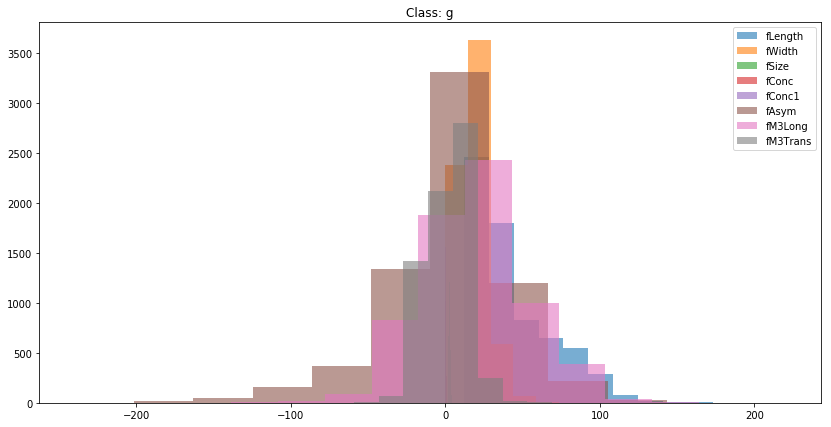

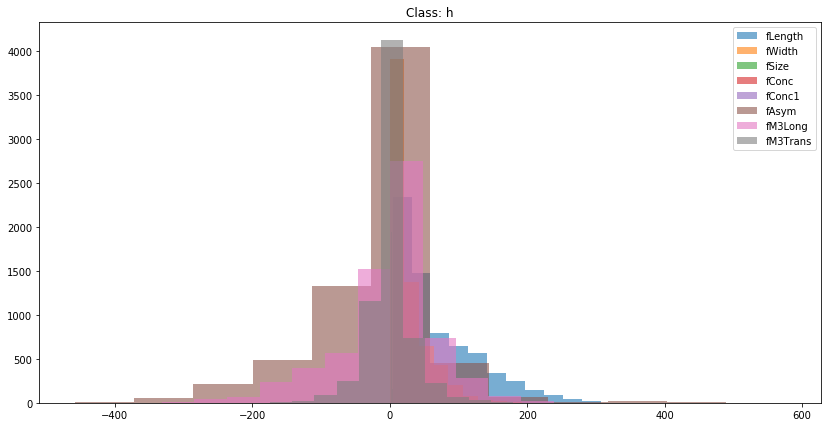

In [218]:
for cl in classes:
    plt_histogram(cl, 12)

#### Observations:
---
1. all samples distributed approximately around 0 mean
2. fConc and fConc1 are strongly positive correlated
3. fConc and fSize are strongly negative correlated
4. fConc, fConc1 and fSize std is near to zero
5. fM3Long and FAsym include the major outliers

## 4. Classification [before data preprocessing]

In [245]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(balanced_df.drop(['class'], axis=1), balanced_df['class'], 
                                                    test_size=0.3, random_state=7)

In [246]:
print("training set size: ", len(y_train))
print("test set size: ", len(y_test))

training set size:  9363
test set size:  4013


In [205]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

1. Decision Tree

In [206]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 71.69%
             precision    recall  f1-score   support

          g       0.72      0.72      0.72      2025
          h       0.71      0.72      0.71      1988

avg / total       0.72      0.72      0.72      4013



2. AdaBoost

In [207]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier().fit(x_train, y_train)

y_pred = ada_boost_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 75.33%
             precision    recall  f1-score   support

          g       0.72      0.83      0.77      2025
          h       0.80      0.68      0.73      1988

avg / total       0.76      0.75      0.75      4013



3. K-Nearest Neighbor (K-NN)

In [208]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(x_train, y_train)

y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 70.05%
             precision    recall  f1-score   support

          g       0.67      0.80      0.73      2025
          h       0.74      0.60      0.67      1988

avg / total       0.71      0.70      0.70      4013



4. Random Forests

In [221]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier().fit(x_train, y_train)

y_pred = rf_cls.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 76.30%
             precision    recall  f1-score   support

          g       0.73      0.85      0.78      2025
          h       0.82      0.67      0.74      1988

avg / total       0.77      0.76      0.76      4013



5. Support Vector Machines (SVM) -linear Kernel

In [210]:
from sklearn.svm import SVC

In [211]:
svm_cls = SVC().fit(x_train, y_train)

y_pred = svm_cls.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 60.83%
             precision    recall  f1-score   support

          g       0.73      0.36      0.48      2025
          h       0.57      0.86      0.69      1988

avg / total       0.65      0.61      0.58      4013



6. Naïve Bayes

In [212]:
from sklearn.naive_bayes import GaussianNB

gnb_cls = GaussianNB().fit(x_train, y_train)

y_pred = gnb_cls.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 63.34%
             precision    recall  f1-score   support

          g       0.59      0.89      0.71      2025
          h       0.77      0.37      0.50      1988

avg / total       0.68      0.63      0.61      4013



## 5. Data Preprocessing

### Remove outliers using z-score

In [5]:
# remove outliers from the whole dataset
from scipy import stats
outliers_free = df[(np.abs(stats.zscore(df.drop(['class'], axis=1))) < 3).all(axis=1)]
outliers_free['class'].value_counts()

g    12191
h     5638
Name: class, dtype: int64

In [6]:
# balncing the dataset
g = outliers_free.groupby('class')
balanced_df = g.apply(lambda x: x.sample(g.size().min())).reset_index(drop=True)
outliers_free = balanced_df

In [8]:
# # outliers percentages in each class
# print('{:.2f}%'.format((outliers_free['class'].value_counts()[0]/(balanced_df.shape[0]/2))*100))
# print('{:.2f}%'.format((outliers_free['class'].value_counts()[1]/(balanced_df.shape[0]/2))*100))

In [9]:
features = outliers_free.drop(['class'], axis=1)
target = outliers_free['class']

### Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
normalized_data = scaler.fit_transform(features)
normalized_data[0]

array([0.46671135, 0.47640841, 0.55266133, 0.15547661, 0.15629114,
       0.66569448, 0.81113023, 0.2223367 , 0.16956222, 0.37552869])

### Features selection

1. Using k-best

In [252]:
from sklearn.feature_selection import SelectKBest

X_new  = SelectKBest(k=5).fit_transform(normalized_data, target)
X_new = pd.DataFrame(X_new)

In [253]:
X_new.head()

,0,1,2,3,4
0,0.029682,0.133092,0.481958,0.495146,0.318933
1,0.068713,0.186379,0.524471,0.464204,0.001767
2,0.057487,0.177679,0.501711,0.529475,0.249600
3,0.079351,0.120461,0.460247,0.427208,0.224578
4,0.494865,0.476642,0.722085,0.752791,0.068880


the best 3 features are 

2. using Ada-Boost Classifier

In [254]:
def plot_importances(importances, top=3, color="darkgreen"):
    fig, ax = plt.subplots(figsize=(12,8))
    ax = plt.bar(features.columns, importances, color="grey")
    tops = sorted(importances, reverse=True)[:top]
    bars = ax.get_children()
    for b in bars:
        if isinstance(b, plt.Rectangle):
            if b.get_height() in tops:
                b.set_color(color)
    plt.show()

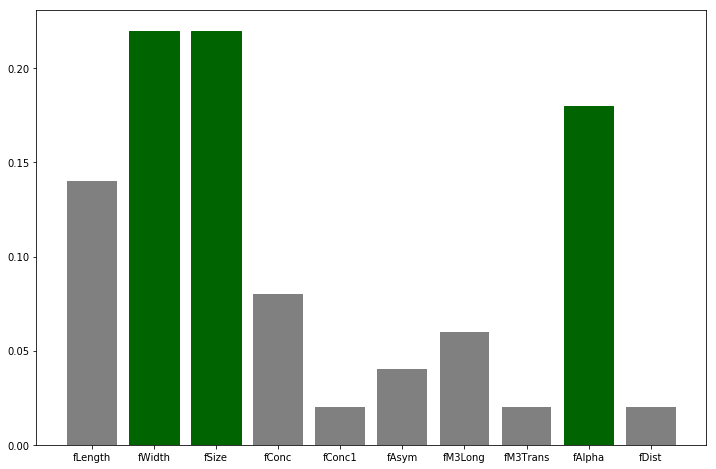

In [128]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier().fit(features, target)

importances = model.feature_importances_
plot_importances(importances)

3. using Decision Tree Classifier

In [129]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(features, target)

importances = model.feature_importances_

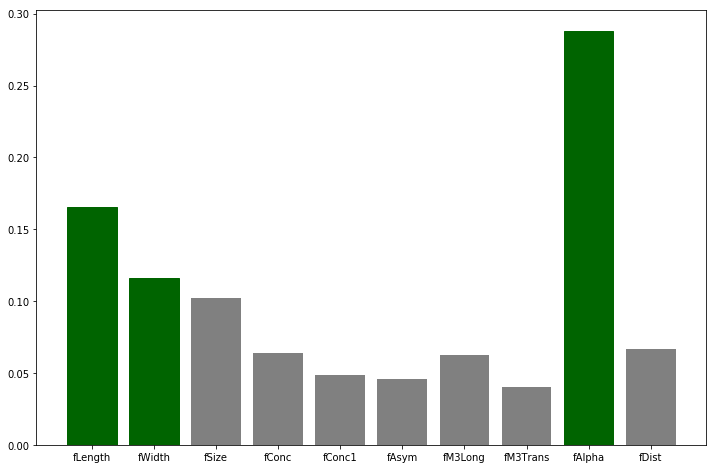

In [130]:
plot_importances(importances)

we select the best 5 features [fLength, fWidth, fSize, fConc, fAlpha]

In [13]:
reduced_data = features[['fLength', 'fWidth', 'fSize', 'fConc', 'fAlpha']]

/home/mohamed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


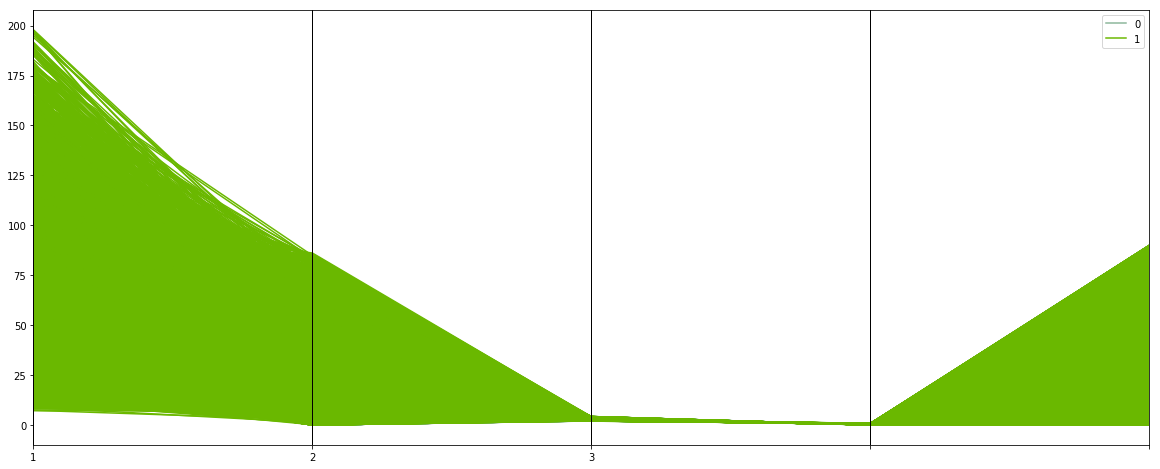

In [201]:
plt.figure(figsize=(20,8))
custom_data = features[['fLength', 'fWidth', 'fSize', 'fConc', 'fAlpha']]
custom_data['class'] = target
ax = pd.plotting.parallel_coordinates(custom_data, 'class');
ax.set(xticks=range(len(custom_data.columns)-1), xticklabels=range(1, len(reduced_data.columns)-1));
ax.grid(False)

In [14]:
target.replace({'g':0, 'h':1}, inplace=True)

## 6. Classification [After Data Preprocessing]

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(reduced_data, target, test_size=0.3, random_state=7)

In [17]:
print("training set size: ", len(y_train))
print("test set size: ", len(y_test))

training set size:  7893
test set size:  3383


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

1. Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier().fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 76.62%
             precision    recall  f1-score   support

          g       0.77      0.75      0.76      1695
          h       0.76      0.78      0.77      1688

avg / total       0.77      0.77      0.77      3383



2. AdaBoost

In [161]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_model = AdaBoostClassifier().fit(x_train, y_train)

y_pred = ada_boost_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 79.91%
             precision    recall  f1-score   support

          g       0.82      0.81      0.81      2009
          h       0.78      0.79      0.78      1739

avg / total       0.80      0.80      0.80      3748



In [179]:
from sklearn.grid_search import GridSearchCV

n_estmators = {'n_estimators': list(range(50,150,5))}
model = AdaBoostClassifier()
grid = GridSearchCV(model, n_estmators, cv=5)
grid.fit(x_train, y_train)

grid.best_params_
best_model = grid.best_estimator_

In [181]:
grid.best_params_

{'n_estimators': 125}

In [180]:
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 81.06%
             precision    recall  f1-score   support

          g       0.82      0.82      0.82      2009
          h       0.80      0.80      0.80      1739

avg / total       0.81      0.81      0.81      3748



3. K-Nearest Neighbor (K-NN)

In [186]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(x_train, y_train)

y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 77.05%
             precision    recall  f1-score   support

          g       0.76      0.83      0.80      2009
          h       0.78      0.70      0.74      1739

avg / total       0.77      0.77      0.77      3748



In [188]:
n_neighbors = {'n_neighbors': list(range(3,20,1))}
model = KNeighborsClassifier()
grid = GridSearchCV(model, n_neighbors, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_

{'n_neighbors': 17}


In [189]:
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 78.23%
             precision    recall  f1-score   support

          g       0.76      0.86      0.81      2009
          h       0.81      0.70      0.75      1739

avg / total       0.79      0.78      0.78      3748



4. Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier().fit(x_train, y_train)

y_pred = rf_cls.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 80.82%
             precision    recall  f1-score   support

          g       0.79      0.84      0.81      1695
          h       0.83      0.78      0.80      1688

avg / total       0.81      0.81      0.81      3383



In [261]:
n_estmators = {'n_estimators': list(range(50,150,5))}
model = RandomForestClassifier()
grid = GridSearchCV(model, n_estmators, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_

{'n_estimators': 140}


In [262]:
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 84.62%
             precision    recall  f1-score   support

          g       0.84      0.88      0.86      2009
          h       0.85      0.80      0.83      1735

avg / total       0.85      0.85      0.85      3744



5. Support Vector Machines (SVM) -linear Kernel

In [194]:
from sklearn.svm import SVC

In [195]:
svm_cls = SVC().fit(x_train, y_train)

y_pred = svm_cls.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 77.75%
             precision    recall  f1-score   support

          g       0.79      0.80      0.79      2009
          h       0.76      0.75      0.76      1739

avg / total       0.78      0.78      0.78      3748



In [197]:
params = {'C': list(range(1,20,2)), 'degree':[2,3,4,5,6]}
model = SVC()
grid = GridSearchCV(model, params, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_

{'C': 1, 'degree': 2}


In [198]:
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 77.75%
             precision    recall  f1-score   support

          g       0.79      0.80      0.79      2009
          h       0.76      0.75      0.76      1739

avg / total       0.78      0.78      0.78      3748



6. Naïve Bayes

In [199]:
from sklearn.naive_bayes import GaussianNB

gnb_cls = GaussianNB().fit(x_train, y_train)

y_pred = gnb_cls.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 71.66%
             precision    recall  f1-score   support

          g       0.70      0.83      0.76      2009
          h       0.75      0.59      0.66      1739

avg / total       0.72      0.72      0.71      3748



## 7. Improve Model

In [ ]:
# training on the whole features
x_train, x_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.3, random_state=7)

In [233]:
from sklearn.ensemble import RandomForestClassifier

rf_cls = RandomForestClassifier().fit(x_train, y_train)

y_pred = rf_cls.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 83.86%
             precision    recall  f1-score   support

          g       0.82      0.90      0.86      2009
          h       0.87      0.77      0.82      1739

avg / total       0.84      0.84      0.84      3748



In [234]:
n_estmators = {'n_estimators': list(range(150,200,10))}
model = RandomForestClassifier()
grid = GridSearchCV(model, n_estmators, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_

{'n_estimators': 170}


In [235]:
y_pred = best_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('model accuracy: {:.2f}%'.format(acc*100))
print(classification_report(y_test, y_pred, target_names=['g', 'h']))

model accuracy: 84.79%
             precision    recall  f1-score   support

          g       0.84      0.89      0.86      2009
          h       0.86      0.80      0.83      1739

avg / total       0.85      0.85      0.85      3748

